## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


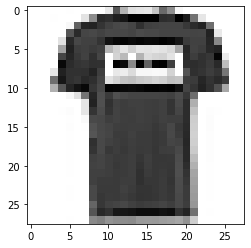

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8249 - accuracy: 0.7292 - val_loss: 0.5516 - val_accuracy: 0.8105


Epoch 2/25


60/60 - 1s - loss: 0.5009 - accuracy: 0.8301 - val_loss: 0.4689 - val_accuracy: 0.8377


Epoch 3/25


60/60 - 1s - loss: 0.4424 - accuracy: 0.8477 - val_loss: 0.4308 - val_accuracy: 0.8510


Epoch 4/25


60/60 - 1s - loss: 0.4091 - accuracy: 0.8591 - val_loss: 0.4083 - val_accuracy: 0.8557


Epoch 5/25


60/60 - 1s - loss: 0.3900 - accuracy: 0.8643 - val_loss: 0.4028 - val_accuracy: 0.8556


Epoch 6/25


60/60 - 1s - loss: 0.3704 - accuracy: 0.8719 - val_loss: 0.3818 - val_accuracy: 0.8657


Epoch 7/25


60/60 - 1s - loss: 0.3548 - accuracy: 0.8749 - val_loss: 0.3700 - val_accuracy: 0.8696


Epoch 8/25


60/60 - 1s - loss: 0.3393 - accuracy: 0.8807 - val_loss: 0.3622 - val_accuracy: 0.8747


Epoch 9/25


60/60 - 1s - loss: 0.3250 - accuracy: 0.8858 - val_loss: 0.3492 - val_accuracy: 0.8777


Epoch 10/25


60/60 - 1s - loss: 0.3128 - accuracy: 0.8899 - val_loss: 0.3514 - val_accuracy: 0.8773


Epoch 11/25


60/60 - 1s - loss: 0.3076 - accuracy: 0.8909 - val_loss: 0.3454 - val_accuracy: 0.8808


Epoch 12/25


60/60 - 1s - loss: 0.2984 - accuracy: 0.8945 - val_loss: 0.3351 - val_accuracy: 0.8806


Epoch 13/25


60/60 - 1s - loss: 0.2943 - accuracy: 0.8955 - val_loss: 0.3311 - val_accuracy: 0.8828


Epoch 14/25


60/60 - 1s - loss: 0.2838 - accuracy: 0.8982 - val_loss: 0.3333 - val_accuracy: 0.8816


Epoch 15/25


60/60 - 1s - loss: 0.2765 - accuracy: 0.9014 - val_loss: 0.3300 - val_accuracy: 0.8829


Epoch 16/25


60/60 - 1s - loss: 0.2753 - accuracy: 0.9023 - val_loss: 0.3509 - val_accuracy: 0.8742


Epoch 17/25


60/60 - 1s - loss: 0.2701 - accuracy: 0.9034 - val_loss: 0.3231 - val_accuracy: 0.8851


Epoch 18/25


60/60 - 1s - loss: 0.2600 - accuracy: 0.9074 - val_loss: 0.3178 - val_accuracy: 0.8886


Epoch 19/25


60/60 - 1s - loss: 0.2550 - accuracy: 0.9086 - val_loss: 0.3290 - val_accuracy: 0.8830


Epoch 20/25


60/60 - 1s - loss: 0.2484 - accuracy: 0.9115 - val_loss: 0.3231 - val_accuracy: 0.8841


Epoch 21/25


60/60 - 1s - loss: 0.2424 - accuracy: 0.9130 - val_loss: 0.3105 - val_accuracy: 0.8907


Epoch 22/25


60/60 - 1s - loss: 0.2389 - accuracy: 0.9154 - val_loss: 0.3171 - val_accuracy: 0.8875


Epoch 23/25


60/60 - 1s - loss: 0.2367 - accuracy: 0.9148 - val_loss: 0.3169 - val_accuracy: 0.8893


Epoch 24/25


60/60 - 1s - loss: 0.2327 - accuracy: 0.9173 - val_loss: 0.3136 - val_accuracy: 0.8884


Epoch 25/25


60/60 - 1s - loss: 0.2292 - accuracy: 0.9185 - val_loss: 0.3239 - val_accuracy: 0.8847


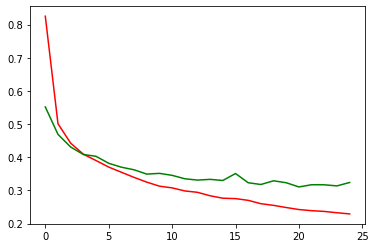

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

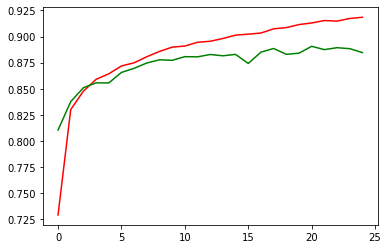

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.2389 - accuracy: 0.8438

 23/313 [=>............................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8723

 46/313 [===>..........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8811

 69/313 [=====>........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8836



 94/313 [========>.....................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8807



118/313 [==========>...................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8776

142/313 [============>.................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8787



165/313 [==============>...............] - ETA: 0s - loss: 0.3558 - accuracy: 0.8761



188/313 [=================>............] - ETA: 0s - loss: 0.3598 - accuracy: 0.8745



208/313 [==================>...........] - ETA: 0s - loss: 0.3581 - accuracy: 0.8744

229/313 [====================>.........] - ETA: 0s - loss: 0.3561 - accuracy: 0.8739



247/313 [======================>.......] - ETA: 0s - loss: 0.3507 - accuracy: 0.8756



267/313 [========================>.....] - ETA: 0s - loss: 0.3482 - accuracy: 0.8763

285/313 [==========================>...] - ETA: 0s - loss: 0.3506 - accuracy: 0.8763

303/313 [============================>.] - ETA: 0s - loss: 0.3510 - accuracy: 0.8757



313/313 [==============================] - 1s 2ms/step - loss: 0.3482 - accuracy: 0.8765


準確度 = 87.7
